[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IkanBalam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IkanBalam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


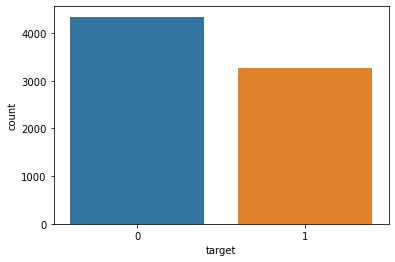

(suicide, bomber)         60
(burning, building)       55
(look, like)              49
(body, bag)               48
(youtube, video)          42
(liked, youtube)          42
(northern, california)    41
(oil, spill)              39
(cross, body)             39
(california, wildfire)    36
(suicide, bombing)        33
(mass, murder)            32
(70, year)                31
(prebreak, best)          30
(feel, like)              30
dtype: int64


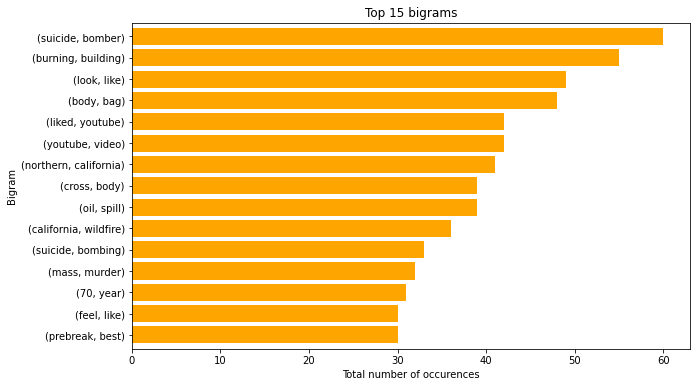

(liked, youtube, video)             42
(suicide, bomber, detonated)        30
(northern, california, wildfire)    29
(latest, home, razed)               28
(home, razed, northern)             28
(bomber, detonated, bomb)           28
(pkk, suicide, bomber)              28
(razed, northern, california)       27
(16yr, old, pkk)                    27
(old, pkk, suicide)                 27
(family, affected, fatal)           26
(affected, fatal, outbreak)         26
(family, sue, legionnaire)          26
(40, family, affected)              26
(sue, legionnaire, 40)              25
dtype: int64


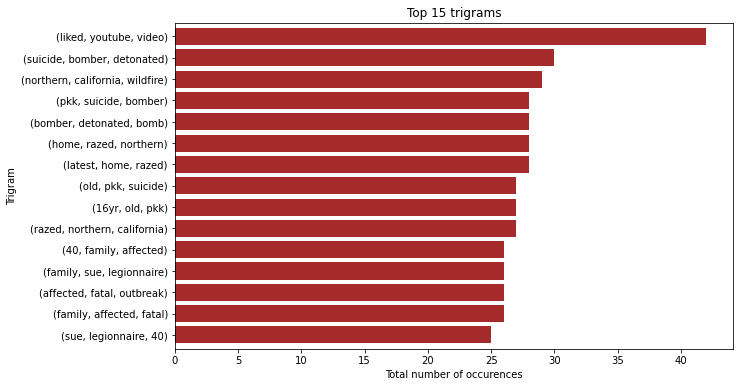

In [21]:
%run Data_Wrangling_and_EDA.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IkanBalam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IkanBalam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


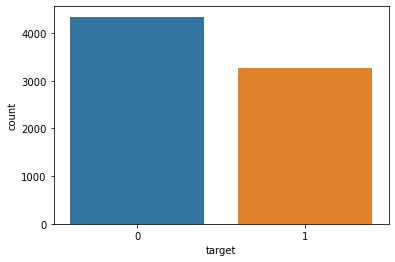

(suicide, bomber)         60
(burning, building)       55
(look, like)              49
(body, bag)               48
(youtube, video)          42
(liked, youtube)          42
(northern, california)    41
(oil, spill)              39
(cross, body)             39
(california, wildfire)    36
(suicide, bombing)        33
(mass, murder)            32
(70, year)                31
(prebreak, best)          30
(feel, like)              30
dtype: int64


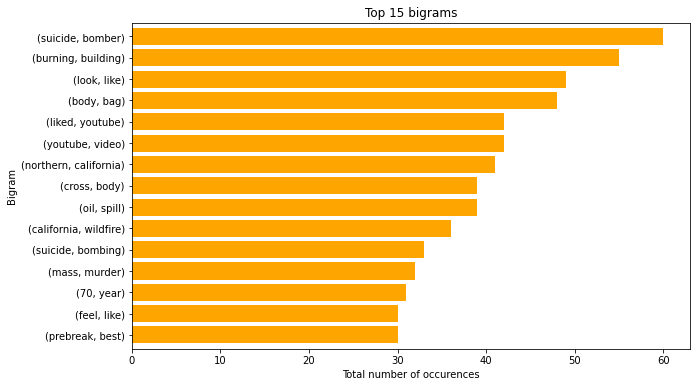

(liked, youtube, video)             42
(suicide, bomber, detonated)        30
(northern, california, wildfire)    29
(latest, home, razed)               28
(home, razed, northern)             28
(bomber, detonated, bomb)           28
(pkk, suicide, bomber)              28
(razed, northern, california)       27
(16yr, old, pkk)                    27
(old, pkk, suicide)                 27
(family, affected, fatal)           26
(affected, fatal, outbreak)         26
(family, sue, legionnaire)          26
(40, family, affected)              26
(sue, legionnaire, 40)              25
dtype: int64


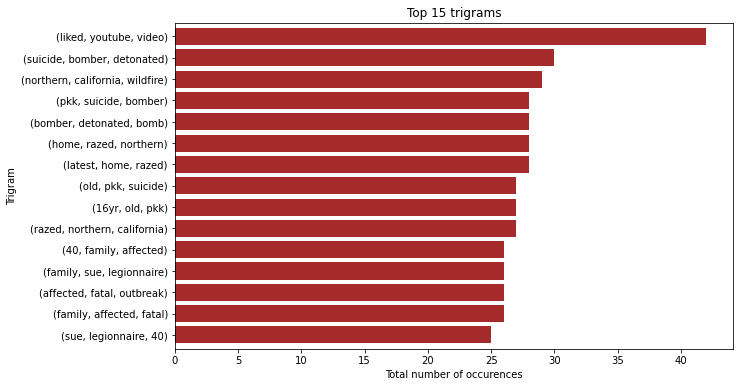

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          1899000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 1)                 10001     
                                                                 
Total params: 1,909,001
Trainable params: 10,001
Non-trainable params: 1,899,000
_________________________________________________________________
None
Epoch 1/6
39/39 [==============================] - 1s 8ms/step - loss: 0.5898 - acc: 0.7007 - val_loss: 0.5302 - val_acc: 0.7463
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 0.4888 - acc: 0.7796 - val_loss: 0.5057 - val_acc: 0.7578
Epoch 3/6
39/39 [======================

In [22]:
%run Pre-Processing_and_Modeling.ipynb

In [28]:
#Prior to the finalized code as written below, a preprocessed and cleaned up dataset of tweets is assumed. The dataset needs
#to be converted to a dataframe and sectioned off by 2 features; the first feature containing the texts or 'tweets' and the 
#second feature containing the feature with labels that needs to be further converted into integers before inputted into the
#deep learning model.

In [ ]:
#A for loop that includes the function 'preprocessor' in the loop body to convert the body of texts within the feature 
#containing the body of tweets into a list of lists by segmenting it in the 'for syntax' before appending it to the X 
#variable. The y variable will hold the labels feature for later use in the model as part of the training and testing sets.

X = []
strings = list(#your processed dataframe here#[#your feature containing the texts(tweets) here#])
for string in strings:
    X.append(preprocessor(string))
    
y = #your dataset here[#the feature containing the labels here]

In [29]:
#Separate the dataset into train and test sets. Use the coding syntax as written below to break the dataset up into their
#respective sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
#Implementing tokenizer class to create a word-to-index dictionary. Key:value --> word:unique index
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

#Writing the script for the embedding layer as part of the pre-processing step. The embedding layer will convert the textual
#data into numeric data and serves as the first layer for Keras' deep learning models.
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [32]:
#Setting max size of each list to 100; longer lists will be truncated and shorter lists will be 'padded' with 0's at the end
#of those lists.
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [33]:
#Glove embeddings used to create feature matrix. Loading glove embeddings to create a dictionary where keys:values are
#words:embeddings lists. The glove file below held in the variable 'g_file' also needs to be downloaded and opened as below.
from numpy import array
from numpy import asarray
from numpy import zeros

embedded_dict = dict()
g_file = open('glove.6B.100d.txt', encoding='utf8')

for line in g_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embedded_dict [word] = vector_dimensions
g_file.close()

In [34]:
#Creating the embedding matrix. Number of rows will match the number of words and each column (100 in total) will have the
#Glove word embeddings; word embeddings are the aggregated global word co-occurence matrices from a given corpus.
embed_mat = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embed_vec = embedded_dict.get(word)
    if embed_vec is not None:
        embed_mat[index] = embed_vec

In [35]:
#Model 2: text classification with CNN (Convolutional Neural Network). Out of the 3 models that I ran the dataset of
#'disaster_tweets' on which included Simple Neural Network, Convolutional Neural Network, and Recurrent Neural Network, I
#ultimately went with the CNN as even though it overfitted the most actually, I took into consideration that this model
#will be used solely to run collected tweets on to identify emergency tweets so we can safely expect any future future
#and differing datasets that would be used on this model to be of the same type and the high accuracy is what we would
#desire here at the expense of overfitting as it is critical to identify emergency tweets so disasters can be correctly 
#identified as this is a use-case where many lives and properties are at stake. The overfitting also would not compromise
#the model working on future datasets as this is solely meant to be used for detecting 'emergency tweets' so all datasets
#would be of similar composition. Further explanations to be provided in the three plots below in this notebook.
from keras.layers import Conv1D

cnn = Sequential()

embed_layer = Embedding(vocab_size, 100, weights=[embed_mat], input_length=maxlen, trainable=False)
cnn.add(embed_layer)

cnn.add(Conv1D(128, 5, activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(1, activation='sigmoid'))

In [36]:
#Compiling the CNN model and getting a summary of the parameters
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 100)          1899000   
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,963,257
Trainable params: 64,257
Non-trainable params: 1,899,000
_________________________________________________________________
None


In [37]:
#Training the model on the training set
history_2 = cnn.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
39/39 [==============================] - 4s 71ms/step - loss: 0.5133 - acc: 0.7525 - val_loss: 0.4773 - val_acc: 0.7767
Epoch 2/6
39/39 [==============================] - 2s 60ms/step - loss: 0.3977 - acc: 0.8206 - val_loss: 0.4657 - val_acc: 0.7874
Epoch 3/6
39/39 [==============================] - 2s 53ms/step - loss: 0.3595 - acc: 0.8448 - val_loss: 0.4560 - val_acc: 0.7939
Epoch 4/6
39/39 [==============================] - 2s 52ms/step - loss: 0.3203 - acc: 0.8670 - val_loss: 0.4558 - val_acc: 0.7972
Epoch 5/6
39/39 [==============================] - 2s 57ms/step - loss: 0.2892 - acc: 0.8871 - val_loss: 0.4574 - val_acc: 0.7956
Epoch 6/6
39/39 [==============================] - 2s 52ms/step - loss: 0.2604 - acc: 0.9056 - val_loss: 0.4926 - val_acc: 0.7742


In [38]:
#Evaluating the performance of the model
result_2 = cnn.evaluate(X_test, y_test, verbose=1)

48/48 [==============================] - 0s 5ms/step - loss: 0.4824 - acc: 0.7774


In [39]:
#Verifying both the accuracy and loss of the testing set
print("test score:", result_2[0])
print("test accuracy", result_2[1])

test score: 0.4824288487434387
test accuracy 0.777413010597229


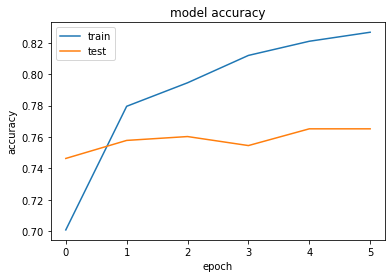

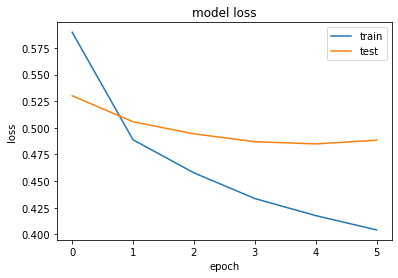

In [23]:
#Plotting to visualize the loss and accuracy values for both the train and test sets of the first model; Simple Neural 
#Network

#Although the overfitting on this model is not as significant as that of the second model below, given the context
#in which type of data that the model will be running, one where lives and property is at great risk, the Simple Neural 
#Network (for which the results of that are in this cell) ultimately was not chosen as our 'best model'. 

plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

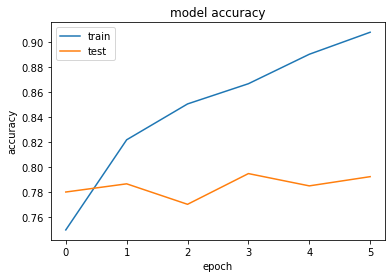

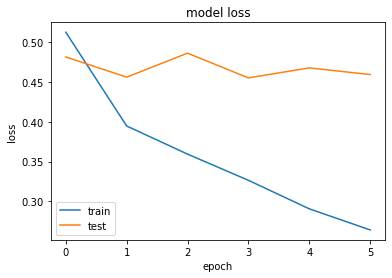

In [25]:
#Plotting to visualize the loss and accuracy values for both the train and test sets of the second model; Convolutional
#Neural Network

#Even though the second model, the Convolutional Neural Network, resulted in the most significant difference between the 
#values of the train and test sets and displayed signficant overfitting, I ultimately chose this model given the context
#here as this model would be used solely for sentiment analysis of tweets to identify whether they are of an emergency
#nature or not. Given the context, predictive performance is extremely important and the test set is definitely
#representative of unseen datasets that would be used in the future as our original problem as laid out in the problem
#identification step of the data science method, is limited in scope and application here to just 'tweets' we suspect to be
#of an emergency type and is binary in classification.

plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

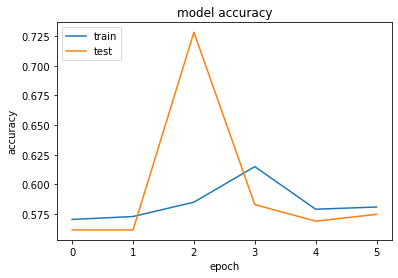

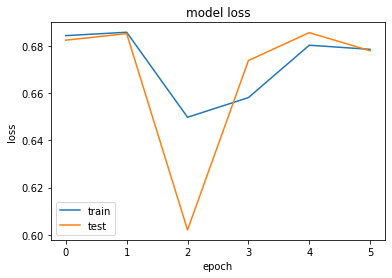

In [27]:
#Plotting to visualize the loss and accuracy values for both the train and test sets of the third model; Recurrent Neural
#Network

#Although the Recurrent Neural Network is a neural network that works great with sequence data which is what text is, a 
#sequence of words, this in theory should have been an optimal model for our purposes but this model returned too low of
#an accuracy given the context of identifying emergency tweets. Ultimately overfitting was not an issue with this model
#as the values for the accuracy and loss can be seen to have converged with only a brief lapse in differences in a few
#of the epochs as detailed in the plots.

plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()